In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from collections import Counter
import matplotlib.pyplot as plt


In [48]:
url = "https://internshala.com/internships/data-analyst-internship"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.0.0 Safari/537.36"
}

In [49]:
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")



In [50]:
job_cards = soup.find_all("div", class_="internship_meta")
print(f"Found {len(job_cards)} internship cards on this page.")

Found 40 internship cards on this page.


In [51]:
titles, companies, locations, skills_list, stipends = [], [], [], [], []

In [52]:
common_skills = ["Python", "SQL", "Excel", "Tableau", "Power BI", "R", "Pandas", "NumPy"]


In [64]:
for card in job_cards:

    title_tag = card.find("a", class_="view_detail_button")
    title = title_tag.get_text(strip=True) if title_tag else "Not mentioned"
    titles.append(title)


    company_tag = card.find("a", class_="link_display_like_text")
    company = company_tag.get_text(strip=True) if company_tag else "Not mentioned"
    companies.append(company)


    location_tag = card.find("a", class_="location_link")
    location = location_tag.get_text(strip=True) if location_tag else "Not mentioned"
    locations.append(location)


    stipend_tag = card.find("span", class_="stipend")
    stipend = stipend_tag.get_text(strip=True) if stipend_tag else "Not mentioned"
    stipends.append(stipend)


    card_text = card.get_text(separator=" ", strip=True)
    skills_found = [skill for skill in common_skills if skill.lower() in card_text.lower()]
    skills_list.append(", ".join(skills_found) if skills_found else "Not mentioned")

    time.sleep(1)

In [62]:
df = pd.DataFrame({
    "Job Title": titles,
    "Company": companies,
    "Location": locations,
    "Skills": skills_list,
    "Stipend": stipends
})

In [63]:
df.to_csv("internshala_data_analyst_jobs.csv", index=False)
print("Data saved successfully!")

Data saved successfully!


In [56]:
print("Total jobs scraped:", df.shape[0])

Total jobs scraped: 40


In [57]:
top_locations = df['Location'].value_counts().head(5)
print("Top Locations:\n", top_locations)

Top Locations:
 Location
Not mentioned    40
Name: count, dtype: int64


In [58]:
all_skills = ", ".join(df['Skills'])
skills = re.split(", |,|;", all_skills)
skills_counter = Counter([s.strip() for s in skills if s and s != "Not mentioned"])
most_common_skills = skills_counter.most_common(10)
print("Most in-demand skills:\n", most_common_skills)

Most in-demand skills:
 [('R', 40), ('Excel', 15), ('Python', 1), ('SQL', 1), ('Tableau', 1), ('Power BI', 1), ('Pandas', 1), ('NumPy', 1)]


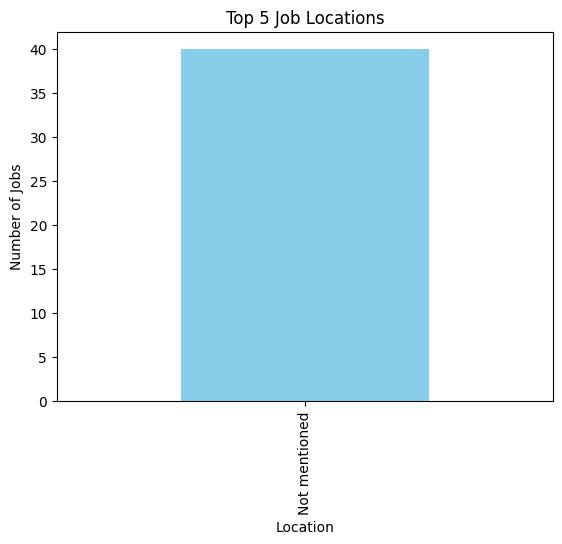

In [59]:
top_locations.plot(kind='bar', color='skyblue', title='Top 5 Job Locations')
plt.xlabel("Location")
plt.ylabel("Number of Jobs")
plt.show()

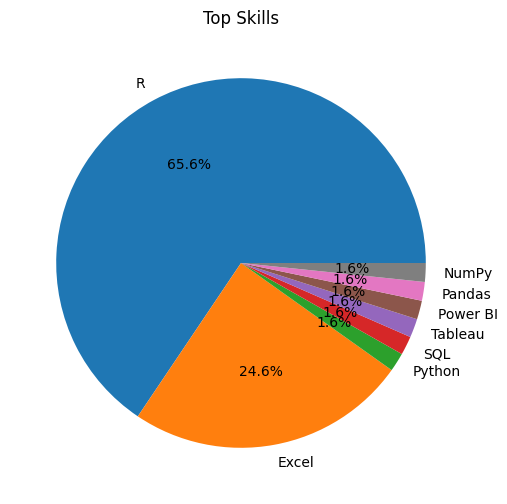

In [60]:
if most_common_skills:  # Only plot if we have skills
    skills_df = pd.DataFrame(most_common_skills, columns=['Skill', 'Count'])
    skills_df['Count'] = pd.to_numeric(skills_df['Count'], errors='coerce')  # ensure numeric
    skills_df.set_index('Skill', inplace=True)
    skills_df.plot(kind='pie', y='Count', autopct='%1.1f%%', legend=False, figsize=(6,6), title="Top Skills")
    plt.ylabel("")
    plt.show()
else:
    print("No skills data available to plot.")